---
### Objetivo:

Uma analise comparativa de pandas X spark (de preferencia no databricks)

### O que fazer:

Pegar 2 datasets um > 50mb e outro menor

Realizar pre-processamento de dados e analise exploratoria dos dados, usando pandas e pyspark

Identificar quando o panda ou pyspark é melhor

### Datasets escolhidos:

https://www.kaggle.com/datasets/swatikhedekar/exploratory-data-analysis-on-netflix-data

Dataset público com informações sobre série e filmes disponiveis na plataforma de streaming Netflix de 2008 a 2021.

Tamanho do dataset = **3.4 mb**


https://www.kaggle.com/datasets/peacehegemony/history-of-music-bnb

Dataset com metadata sobre o catalogo de músicas na livraria britânica em http://explore.bl.uk

Tamanho do dataset = **261 mb**

---

In [1]:
# Importando as bibliotecas que serão utilizadas
import time # para registrar o tempo de execução
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

---
### Trabalhando com o Dataset menor usando PANDAS
---

In [2]:
inicio_pandas_netflix = time.time()

In [3]:
# Leitura do arquivo csv

netflix = pd.read_csv('netflix_titles_2021.csv')
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
#verificando o tamanho do dataset

netflix.shape

(8807, 12)

In [5]:
# Alterando os nomes das colunas

colunas = {'type':'tipo', 'title':'titulo', 'director':'diretor', 'cast':'elenco',
            'country':'pais', 'date_added':'adicionado_em','release_year':'ano_lancamento',
            'rating':'avaliacao', 'duration':'duracao', 'listed_in':'categorias', 'description':'descricao'}

netflix.rename(columns=colunas, inplace=True)

In [6]:
netflix.head()

,show_id,tipo,titulo,diretor,elenco,pais,adicionado_em,ano_lancamento,avaliacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# Contagem percentual de valores nulos no dataframe

frequencia = netflix.isna().sum() 
percentual_na = round((netflix.isna().sum() / len(netflix))*100, 2)
valores_na = pd.DataFrame([frequencia, percentual_na]).transpose().rename(columns={0:'Frequência', 1:'% de NAs'})
valores_na

,Frequência,% de NAs
show_id,0.0,0.00
tipo,0.0,0.00
titulo,0.0,0.00
diretor,2634.0,29.91
elenco,825.0,9.37
pais,831.0,9.44
adicionado_em,10.0,0.11
ano_lancamento,0.0,0.00
avaliacao,4.0,0.05
duracao,3.0,0.03


In [8]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   show_id         8807 non-null   object
 1   tipo            8807 non-null   object
 2   titulo          8807 non-null   object
 3   diretor         6173 non-null   object
 4   elenco          7982 non-null   object
 5   pais            7976 non-null   object
 6   adicionado_em   8797 non-null   object
 7   ano_lancamento  8807 non-null   int64 
 8   avaliacao       8803 non-null   object
 9   duracao         8804 non-null   object
 10  categorias      8807 non-null   object
 11  descricao       8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
# Otimizando o tamanho da variável ano_lancamento

netflix['ano_lancamento'] = netflix["ano_lancamento"].astype('int16')

In [10]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   show_id         8807 non-null   object
 1   tipo            8807 non-null   object
 2   titulo          8807 non-null   object
 3   diretor         6173 non-null   object
 4   elenco          7982 non-null   object
 5   pais            7976 non-null   object
 6   adicionado_em   8797 non-null   object
 7   ano_lancamento  8807 non-null   int16 
 8   avaliacao       8803 non-null   object
 9   duracao         8804 non-null   object
 10  categorias      8807 non-null   object
 11  descricao       8807 non-null   object
dtypes: int16(1), object(11)
memory usage: 774.2+ KB


In [11]:
# Cria um dicionário com os valores dos meses

import calendar

meses = dict((month, str(index)) for index, month in enumerate(calendar.month_name) if month)
meses

{'January': '1',
 'February': '2',
 'March': '3',
 'April': '4',
 'May': '5',
 'June': '6',
 'July': '7',
 'August': '8',
 'September': '9',
 'October': '10',
 'November': '11',
 'December': '12'}

In [12]:
# modificando o texto para achar um padrão para o split 
netflix['adicionado_em'] = netflix.adicionado_em.str.strip()
netflix['adicionado_em'] = netflix['adicionado_em'].str.replace(', ', '/')
netflix['adicionado_em'] = netflix['adicionado_em'].str.replace(' ', '/')

In [13]:
# separação do valor adicionado_em em dia, mês e ano

data = netflix['adicionado_em'].str.split('/', n = 2, expand = True)
mes = data[0]
dia = data[1]
ano = data[2]

In [14]:
# substituição dos nomes dos meses por seus respectivos valores

mes.replace(meses, inplace=True)

In [15]:
# novo dataframe pandas para inclusão da coluna de data

data = pd.DataFrame([dia, mes, ano]).transpose().rename(columns={1:'dia', 0:'mes', 2:'ano'})
data.dia = data.dia.str.zfill(2)
data.mes = data.mes.str.zfill(2)
data['data'] = data.dia + '/' + data.mes + '/' + data.ano

In [16]:
# remoção das colunas dia, mes e ano
data.drop(columns=['dia', 'mes', 'ano'], inplace=True)

In [17]:
# modifica a coluna adicionado_em para valores com datas no formato dd/mm/yyyy.
netflix['adicionado_em'] = data
netflix.head(5)

,show_id,tipo,titulo,diretor,elenco,pais,adicionado_em,ano_lancamento,avaliacao,duracao,categorias,descricao
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25/09/2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24/09/2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24/09/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24/09/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24/09/2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
netflix['adicionado_em'] = netflix['adicionado_em'].astype('datetime64[ns]')

C:\Users\PC MATRIX\AppData\Local\Temp\ipykernel_6488\3237889366.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  netflix['adicionado_em'] = netflix['adicionado_em'].astype('datetime64[ns]')


In [19]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8807 non-null   object        
 1   tipo            8807 non-null   object        
 2   titulo          8807 non-null   object        
 3   diretor         6173 non-null   object        
 4   elenco          7982 non-null   object        
 5   pais            7976 non-null   object        
 6   adicionado_em   8797 non-null   datetime64[ns]
 7   ano_lancamento  8807 non-null   int16         
 8   avaliacao       8803 non-null   object        
 9   duracao         8804 non-null   object        
 10  categorias      8807 non-null   object        
 11  descricao       8807 non-null   object        
dtypes: datetime64[ns](1), int16(1), object(10)
memory usage: 774.2+ KB


In [20]:
# Agrupando os valores por categorias

categorias = netflix['categorias'].value_counts()
categorias

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: categorias, Length: 514, dtype: int64

In [21]:
# Top 3 categorias

top_3_categorias = categorias.head(3)
top_3_categorias


Dramas, International Movies    362
Documentaries                   359
Stand-Up Comedy                 334
Name: categorias, dtype: int64

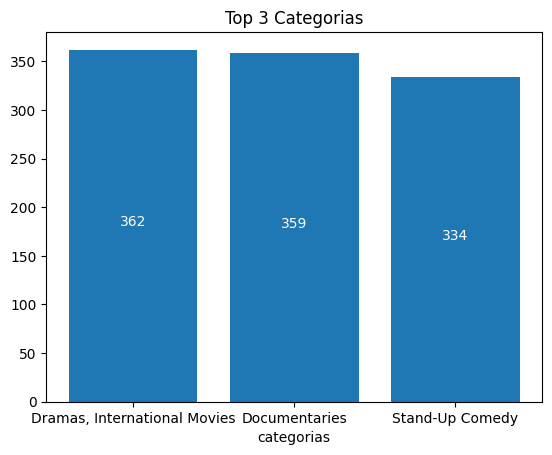

In [22]:
# função para add valores nas barras 
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color = 'white')


plt.bar(x=top_3_categorias.index, height=top_3_categorias)
plt.xlabel('categorias')
plt.title('Top 3 Categorias')
addlabels(x=top_3_categorias.index, y=top_3_categorias)
plt.show()

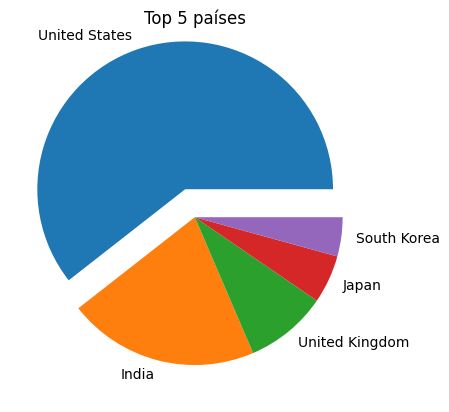

In [23]:
# Top 5 Países
paises = netflix.pais.value_counts().head(5)
paises
label = paises.index
myexplode = [0.2, 0, 0, 0, 0]
plt.pie(paises, labels=label, explode=myexplode)
plt.title('Top 5 países')
plt.show()

In [24]:
# retornado os valores nulos do dataset

netflix_transformado = netflix.dropna()
netflix_transformado.head(5)

,show_id,tipo,titulo,diretor,elenco,pais,adicionado_em,ano_lancamento,avaliacao,duracao,categorias,descricao
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [25]:
netflix_transformado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         5332 non-null   object        
 1   tipo            5332 non-null   object        
 2   titulo          5332 non-null   object        
 3   diretor         5332 non-null   object        
 4   elenco          5332 non-null   object        
 5   pais            5332 non-null   object        
 6   adicionado_em   5332 non-null   datetime64[ns]
 7   ano_lancamento  5332 non-null   int16         
 8   avaliacao       5332 non-null   object        
 9   duracao         5332 non-null   object        
 10  categorias      5332 non-null   object        
 11  descricao       5332 non-null   object        
dtypes: datetime64[ns](1), int16(1), object(10)
memory usage: 510.3+ KB


In [26]:
# separando o dataset por duração (Season)

selecao = netflix_transformado.duracao.str.contains('Season')
season = netflix_transformado[selecao]
season.head()

,show_id,tipo,titulo,diretor,elenco,pais,adicionado_em,ano_lancamento,avaliacao,duracao,categorias,descricao
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,2021-08-27,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...
273,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,2021-08-13,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i..."
276,s277,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,2021-08-13,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...",A writer in creative and marital crises finds ...
297,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,2021-06-08,2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions..."


In [27]:
season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 8 to 8599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         147 non-null    object        
 1   tipo            147 non-null    object        
 2   titulo          147 non-null    object        
 3   diretor         147 non-null    object        
 4   elenco          147 non-null    object        
 5   pais            147 non-null    object        
 6   adicionado_em   147 non-null    datetime64[ns]
 7   ano_lancamento  147 non-null    int16         
 8   avaliacao       147 non-null    object        
 9   duracao         147 non-null    object        
 10  categorias      147 non-null    object        
 11  descricao       147 non-null    object        
dtypes: datetime64[ns](1), int16(1), object(10)
memory usage: 14.1+ KB


In [28]:
# separando o dataset por duração (Minutos)

selecao = netflix_transformado.duracao.str.contains('min')
filmes_minutos = netflix_transformado[selecao]
filmes_minutos.reset_index(inplace=True, drop=True)
filmes_minutos.head()

,show_id,tipo,titulo,diretor,elenco,pais,adicionado_em,ano_lancamento,avaliacao,duracao,categorias,descricao
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
2,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
3,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
4,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...


In [29]:
filmes_minutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         5185 non-null   object        
 1   tipo            5185 non-null   object        
 2   titulo          5185 non-null   object        
 3   diretor         5185 non-null   object        
 4   elenco          5185 non-null   object        
 5   pais            5185 non-null   object        
 6   adicionado_em   5185 non-null   datetime64[ns]
 7   ano_lancamento  5185 non-null   int16         
 8   avaliacao       5185 non-null   object        
 9   duracao         5185 non-null   object        
 10  categorias      5185 non-null   object        
 11  descricao       5185 non-null   object        
dtypes: datetime64[ns](1), int16(1), object(10)
memory usage: 455.8+ KB


In [30]:
# tranformando o valor da duração em minutos (str) para int
filmes_minutos['duracao'] = filmes_minutos.loc[:, 'duracao'].str.replace(' min', '')
filmes_minutos.head(5)

C:\Users\PC MATRIX\AppData\Local\Temp\ipykernel_6488\1706945141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmes_minutos['duracao'] = filmes_minutos.loc[:, 'duracao'].str.replace(' min', '')


,show_id,tipo,titulo,diretor,elenco,pais,adicionado_em,ano_lancamento,avaliacao,duracao,categorias,descricao
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
2,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...
3,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
4,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103,Comedies,Mourning the loss of their beloved junior high...


In [31]:
filmes_minutos.duracao = filmes_minutos.loc[:, 'duracao'].astype('int16')

C:\Users\PC MATRIX\AppData\Local\Temp\ipykernel_6488\3179336111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filmes_minutos.duracao = filmes_minutos.loc[:, 'duracao'].astype('int16')


In [32]:
filmes_minutos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         5185 non-null   object        
 1   tipo            5185 non-null   object        
 2   titulo          5185 non-null   object        
 3   diretor         5185 non-null   object        
 4   elenco          5185 non-null   object        
 5   pais            5185 non-null   object        
 6   adicionado_em   5185 non-null   datetime64[ns]
 7   ano_lancamento  5185 non-null   int16         
 8   avaliacao       5185 non-null   object        
 9   duracao         5185 non-null   int16         
 10  categorias      5185 non-null   object        
 11  descricao       5185 non-null   object        
dtypes: datetime64[ns](1), int16(2), object(9)
memory usage: 425.5+ KB


In [33]:
# Média de duração dos filmes (min)

media_duracao = round(filmes_minutos.duracao.mean(), 2)
media_duracao

102.7

In [34]:
# Verificando as estatísticas básicas do dataset filmes_minutos

filmes_minutos.duracao.describe()

count    5185.000000
mean      102.701446
std        25.962914
min         8.000000
25%        89.000000
50%       101.000000
75%       117.000000
max       253.000000
Name: duracao, dtype: float64

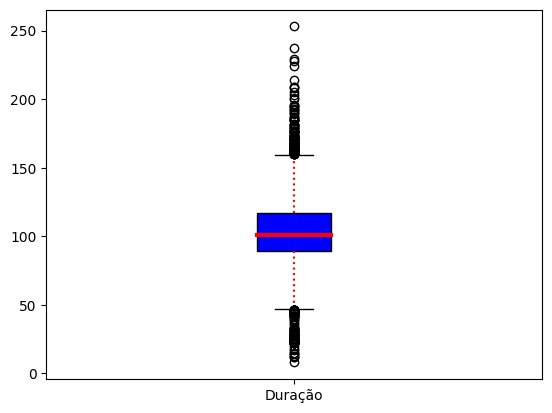

In [35]:
# boxplot - verificando outliers

bp = plt.boxplot(x='duracao', data=filmes_minutos, vert=1, patch_artist=True, labels=['Duração'])
colors = 'blue'
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
for whisker in bp['whiskers']:
    whisker.set(color ='red',
                linewidth = 1.5,
                linestyle =":")
plt.show()

In [36]:
fim_pandas_netflix = time.time()

---
### Trabalhando com o Dataset menor usando SPARK
---

In [37]:
inicio_spark_netflix = time.time()

In [38]:
## iniciando o spark

spark = SparkSession.builder.appName("Netflix Data").getOrCreate()


In [39]:
#lendo o arquivo .csv

netflix = spark.read.csv("netflix_titles_2021.csv", sep= ',' , header=True, multiLine=True)

netflix.show(n=10, truncate=True, vertical=False)

+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+------------+------+---------+--------------------+--------------------+
|show_id|   type|               title|            director|                cast|             country|        date_added|release_year|rating| duration|           listed_in|         description|
+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+------------+------+---------+--------------------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|     Kirsten Johnson|                null|       United States|September 25, 2021|        2020| PG-13|   90 min|       Documentaries|As her father nea...|
|     s2|TV Show|       Blood & Water|                null|Ama Qamata, Khosi...|        South Africa|September 24, 2021|        2021| TV-MA|2 Seasons|International TV ...|After crossing pa...|
|     s3|TV Show|           Ganglan

In [40]:
#verificando o tamanho do dataset

print((netflix.count(),len(netflix.columns)))

(8807, 12)


In [41]:
colunas = {'type':'tipo', 'title':'titulo', 'director':'diretor', 'cast':'elenco',
            'country':'pais', 'date_added':'adicionado_em','release_year':'ano_lancamento',
            'rating':'avaliacao', 'duration':'duracao', 'listed_in':'categorias', 'description':'descricao'}

In [42]:
for old_name, new_name in colunas.items():
  netflix = netflix.withColumnRenamed(old_name, new_name)

In [43]:
netflix.show(10)

+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+--------------+---------+---------+--------------------+--------------------+
|show_id|   tipo|              titulo|             diretor|              elenco|                pais|     adicionado_em|ano_lancamento|avaliacao|  duracao|          categorias|           descricao|
+-------+-------+--------------------+--------------------+--------------------+--------------------+------------------+--------------+---------+---------+--------------------+--------------------+
|     s1|  Movie|Dick Johnson Is Dead|     Kirsten Johnson|                null|       United States|September 25, 2021|          2020|    PG-13|   90 min|       Documentaries|As her father nea...|
|     s2|TV Show|       Blood & Water|                null|Ama Qamata, Khosi...|        South Africa|September 24, 2021|          2021|    TV-MA|2 Seasons|International TV ...|After crossing pa...|
|     s3|T

In [44]:
# Verificando os valores ausentes
from pyspark.sql import functions as f

frequencia = netflix.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in netflix.columns])
percentual_na = netflix.select([(f.count(f.when(f.isnull(c), 1))/netflix.count() *100).alias(c) for c in netflix.columns])
percentual_na = percentual_na.select([f.round(c,2).alias(c) for c in percentual_na.columns])
valores_ausentes = frequencia.unionAll(percentual_na)
valores_ausentes.show()

+-------+----+------+-------+------+-----+-------------+--------------+---------+-------+----------+---------+
|show_id|tipo|titulo|diretor|elenco| pais|adicionado_em|ano_lancamento|avaliacao|duracao|categorias|descricao|
+-------+----+------+-------+------+-----+-------------+--------------+---------+-------+----------+---------+
|    0.0| 0.0|   0.0| 2634.0| 825.0|830.0|         11.0|           0.0|      4.0|    3.0|       0.0|      0.0|
|    0.0| 0.0|   0.0|  29.91|  9.37| 9.42|         0.12|           0.0|     0.05|   0.03|       0.0|      0.0|
+-------+----+------+-------+------+-----+-------------+--------------+---------+-------+----------+---------+



In [45]:
valores_ausentes.toPandas().transpose().rename(columns={0:'Frequência', 1:'% de NAs'})

,Frequência,% de NAs
show_id,0.0,0.00
tipo,0.0,0.00
titulo,0.0,0.00
diretor,2634.0,29.91
elenco,825.0,9.37
pais,830.0,9.42
adicionado_em,11.0,0.12
ano_lancamento,0.0,0.00
avaliacao,4.0,0.05
duracao,3.0,0.03


In [46]:
# verificando os tipos de dados do df
netflix.printSchema()

root
 |-- show_id: string (nullable = true)
 |-- tipo: string (nullable = true)
 |-- titulo: string (nullable = true)
 |-- diretor: string (nullable = true)
 |-- elenco: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- adicionado_em: string (nullable = true)
 |-- ano_lancamento: string (nullable = true)
 |-- avaliacao: string (nullable = true)
 |-- duracao: string (nullable = true)
 |-- categorias: string (nullable = true)
 |-- descricao: string (nullable = true)



In [47]:
# Otimizando o tamanho da variável ano_lancamento

from pyspark.sql.types import IntegerType, StringType

netflix = netflix.withColumn('ano_lancamento', netflix['ano_lancamento'].cast(IntegerType()))

In [48]:
netflix.printSchema()

root
 |-- show_id: string (nullable = true)
 |-- tipo: string (nullable = true)
 |-- titulo: string (nullable = true)
 |-- diretor: string (nullable = true)
 |-- elenco: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- adicionado_em: string (nullable = true)
 |-- ano_lancamento: integer (nullable = true)
 |-- avaliacao: string (nullable = true)
 |-- duracao: string (nullable = true)
 |-- categorias: string (nullable = true)
 |-- descricao: string (nullable = true)



In [49]:
# adicionando as colunas mes, dia e ano

netflix = netflix.withColumn('mes', f.split(netflix['adicionado_em'], ' ').getItem(0))
netflix = netflix.withColumn('dia', f.split(netflix['adicionado_em'], ' ').getItem(1))
netflix = netflix.withColumn('dia', f.regexp_replace('dia', ',', ''))
netflix = netflix.withColumn('ano', f.split(netflix['adicionado_em'], ' ').getItem(2))

In [50]:
# Cria um dicionário com os valores dos meses

import calendar

meses = dict((month, str(index)) for index, month in enumerate(calendar.month_name) if month)
meses

{'January': '1',
 'February': '2',
 'March': '3',
 'April': '4',
 'May': '5',
 'June': '6',
 'July': '7',
 'August': '8',
 'September': '9',
 'October': '10',
 'November': '11',
 'December': '12'}

In [51]:
# função para recuperar os valores dos meses

netflix = netflix.replace(meses,subset=['mes'])

In [52]:
# preenche com 0 as colunas de dia e mes que tem valores < 10

netflix = netflix.withColumn('mes', f.lpad(netflix.mes,2, '0'))
netflix = netflix.withColumn("mes", f.concat(f.lit("-"), f.col("mes"), f.lit("-")))
netflix = netflix.withColumn('dia', f.lpad(netflix.dia,2, '0'))

In [53]:
# concatenando as colunas ano-mes-dia
netflix = netflix.withColumn('data', f.concat(netflix.ano, netflix.mes, netflix.dia))

In [54]:
# retirando colunas desnecessárias

cols = ("adicionado_em","mes","dia", "ano")

netflix = netflix.drop(*cols)

In [55]:
# mudando o nome da coluna data para adicionado_em
netflix = netflix.withColumnRenamed('data', 'adicionado_em')

In [56]:
# mudando o tipo da variável adicionado_em de str para date

netflix = netflix.withColumn('adicionado_em', f.to_date(netflix.adicionado_em))

In [57]:
# Agrupando os valores por categorias

categorias = netflix.groupBy('categorias').agg(f.count("*").alias("total")).sort(f.desc('total'))                
categorias.show(5)

+--------------------+-----+
|          categorias|total|
+--------------------+-----+
|Dramas, Internati...|  361|
|       Documentaries|  358|
|     Stand-Up Comedy|  334|
|Comedies, Dramas,...|  273|
|Dramas, Independe...|  252|
+--------------------+-----+
only showing top 5 rows



In [58]:
# Top 3 categorias

top_3_categorias = categorias.limit(3)
top_3_categorias.show()

+--------------------+-----+
|          categorias|total|
+--------------------+-----+
|Dramas, Internati...|  361|
|       Documentaries|  358|
|     Stand-Up Comedy|  334|
+--------------------+-----+



In [59]:
top_3_categorias = top_3_categorias.toPandas()
top_3_categorias

,categorias,total
0,"Dramas, International Movies",361
1,Documentaries,358
2,Stand-Up Comedy,334


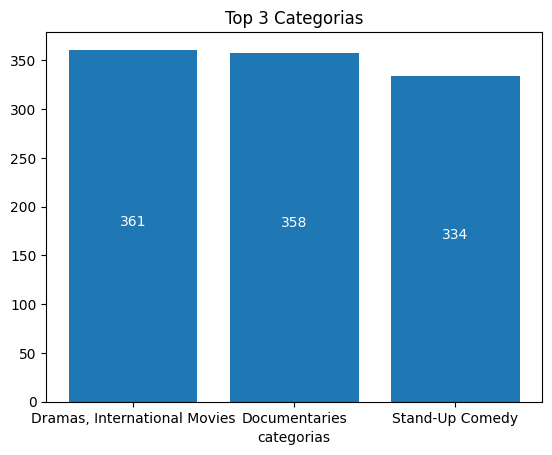

In [60]:
import matplotlib.pyplot as plt

# função para add valores nas barras 
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color = 'white')

plt.bar(x=top_3_categorias.categorias, height=top_3_categorias.total)
plt.xlabel('categorias')
plt.title('Top 3 Categorias')
addlabels(x=top_3_categorias.categorias, y=top_3_categorias.total)
plt.show()

In [61]:
# Top 5 Países
paises = netflix.filter('pais IS NOT NULL')
paises = paises.groupBy('pais').agg(f.count('*').alias('total')).sort(f.desc('total'))
top_paises = paises.limit(5)
top_paises.show()
top_paises = top_paises.toPandas()
top_paises

+--------------+-----+
|          pais|total|
+--------------+-----+
| United States| 2806|
|         India|  972|
|United Kingdom|  419|
|         Japan|  245|
|   South Korea|  199|
+--------------+-----+



,pais,total
0,United States,2806
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


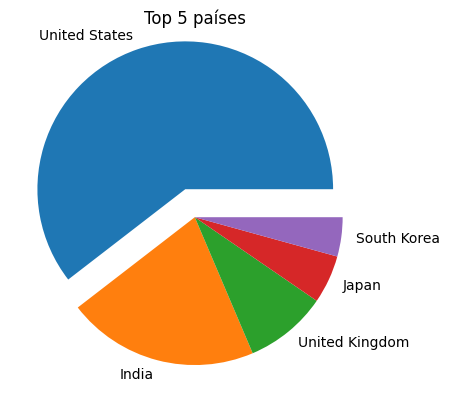

In [62]:
# plotando o gráfico de pizza

label = top_paises.pais
myexplode = [0.2, 0, 0, 0, 0]
plt.pie(top_paises.total, labels=label, explode=myexplode)
plt.title('Top 5 países')
plt.show()

In [63]:
# retirando os valores nulos do dataset

netflix_transformado = netflix.na.drop()

In [64]:
netflix_transformado.count()

5312

In [65]:
from operator import contains
from numpy.lib.function_base import select
# separando o dataset por duração (Season)

season = netflix_transformado.filter(netflix_transformado.duracao.like('%Season%'))

season.show(5)
season.count()

+-------+-------+--------------------+--------------------+--------------------+--------------+--------------+---------+---------+--------------------+--------------------+-------------+
|show_id|   tipo|              titulo|             diretor|              elenco|          pais|ano_lancamento|avaliacao|  duracao|          categorias|           descricao|adicionado_em|
+-------+-------+--------------------+--------------------+--------------------+--------------+--------------+---------+---------+--------------------+--------------------+-------------+
|     s9|TV Show|The Great British...|     Andy Devonshire|Mel Giedroyc, Sue...|United Kingdom|          2021|    TV-14|9 Seasons|British TV Shows,...|A talented batch ...|   2021-09-24|
|   s274|TV Show|       Gone for Good|  Juan Carlos Medina|Finnegan Oldfield...|        France|          2021|    TV-MA| 1 Season|Crime TV Shows, I...|Ten years after l...|   2021-08-13|
|   s277|TV Show|             Valeria|       Inma Torrente|Diana 

142

In [66]:
# separando o dataset por duração (Minutos)

filmes_minutos = netflix_transformado.filter(netflix_transformado.duracao.contains('min'))
filmes_minutos.show(5)

+-------+-----+------------+-------------------+--------------------+--------------------+--------------+---------+-------+--------------------+--------------------+-------------+
|show_id| tipo|      titulo|            diretor|              elenco|                pais|ano_lancamento|avaliacao|duracao|          categorias|           descricao|adicionado_em|
+-------+-----+------------+-------------------+--------------------+--------------------+--------------+---------+-------+--------------------+--------------------+-------------+
|     s8|Movie|     Sankofa|       Haile Gerima|Kofi Ghanaba, Oya...|United States, Gh...|          1993|    TV-MA|125 min|Dramas, Independe...|On a photo shoot ...|   2021-09-24|
|    s10|Movie|The Starling|     Theodore Melfi|Melissa McCarthy,...|       United States|          2021|    PG-13|104 min|    Comedies, Dramas|A woman adjusting...|   2021-09-24|
|    s13|Movie|Je Suis Karl|Christian Schwochow|Luna Wedler, Jann...|Germany, Czech Re...|          

In [67]:
# tranformando o valor da duração em minutos (str) para int
filmes_minutos = filmes_minutos.withColumn('duracao', f.regexp_replace('duracao', ' min', ''))
filmes_minutos.show(5)

+-------+-----+------------+-------------------+--------------------+--------------------+--------------+---------+-------+--------------------+--------------------+-------------+
|show_id| tipo|      titulo|            diretor|              elenco|                pais|ano_lancamento|avaliacao|duracao|          categorias|           descricao|adicionado_em|
+-------+-----+------------+-------------------+--------------------+--------------------+--------------+---------+-------+--------------------+--------------------+-------------+
|     s8|Movie|     Sankofa|       Haile Gerima|Kofi Ghanaba, Oya...|United States, Gh...|          1993|    TV-MA|    125|Dramas, Independe...|On a photo shoot ...|   2021-09-24|
|    s10|Movie|The Starling|     Theodore Melfi|Melissa McCarthy,...|       United States|          2021|    PG-13|    104|    Comedies, Dramas|A woman adjusting...|   2021-09-24|
|    s13|Movie|Je Suis Karl|Christian Schwochow|Luna Wedler, Jann...|Germany, Czech Re...|          

In [68]:
filmes_minutos = filmes_minutos.withColumn('duracao', filmes_minutos['duracao'].cast(IntegerType()))
filmes_minutos.printSchema()

root
 |-- show_id: string (nullable = true)
 |-- tipo: string (nullable = true)
 |-- titulo: string (nullable = true)
 |-- diretor: string (nullable = true)
 |-- elenco: string (nullable = true)
 |-- pais: string (nullable = true)
 |-- ano_lancamento: integer (nullable = true)
 |-- avaliacao: string (nullable = true)
 |-- duracao: integer (nullable = true)
 |-- categorias: string (nullable = true)
 |-- descricao: string (nullable = true)
 |-- adicionado_em: date (nullable = true)



In [69]:
from numpy.core.fromnumeric import mean
# Média de duração dos filmes (min)

media_duracao = filmes_minutos.select(f.mean(filmes_minutos.duracao).alias('media'))
media_duracao = media_duracao.select(f.round('media', 2))
media_duracao.show()

+---------------+
|round(media, 2)|
+---------------+
|         102.69|
+---------------+



In [70]:
# Verificando as estatísticas básicas do dataset filmes_minutos

filmes_minutos.select("duracao").summary().show()

+-------+------------------+
|summary|           duracao|
+-------+------------------+
|  count|              5170|
|   mean| 102.6889748549323|
| stddev|25.914707009384237|
|    min|                 8|
|    25%|                89|
|    50%|               100|
|    75%|               116|
|    max|               253|
+-------+------------------+



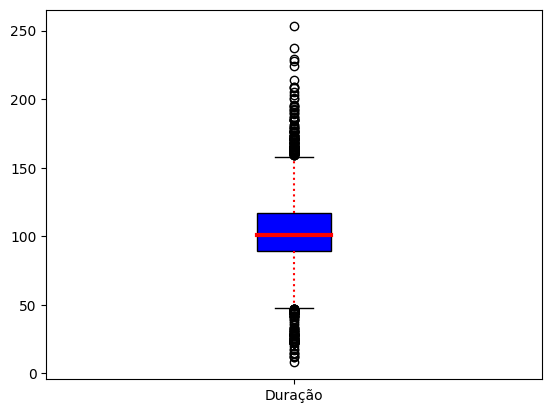

In [71]:
# boxplot - verificando outliers

filmes_minutos_plot = filmes_minutos.toPandas()

bp = plt.boxplot(x='duracao', data=filmes_minutos_plot, vert=1, patch_artist=True, labels=['Duração'])
colors = 'blue'
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
for whisker in bp['whiskers']:
    whisker.set(color ='red',
                linewidth = 1.5,
                linestyle =":")
plt.show()

In [72]:
fim_spark_netflix = time.time()

---
### Trabalhando com o Dataset maior usando PANDAS
---

In [73]:
inicio_pandas_musica = time.time()

In [74]:
# Leitura do arquivo csv

musicas = pd.read_csv('2detailedrecords.csv', engine='python', on_bad_lines='skip')
musicas.head(10)

,BL record ID,Composer,Composer life dates,Title,Standardised title,Other titles,Other names,Publication date (standardised),Publication date (not standardised),Country of publication,...,Contents,Referenced in,Subject/genre terms,Physical description,Series title,Number within series,ISBN,ISMN,Publisher number,BL shelfmark
0,1279866,NaN,NaN,The Penguin book of Canadian Folk songs,NaN,Canadian folk songs,"Fowke, Edith ; MacMillan, Keith (Keith Campbell)",1973.0,1973,England,...,A Fenian song -- Bold Wolfe -- The battle of t...,NaN,"Folk songs--Canada ; Folk songs, French--Canada","224 pages, music, 20 cm",NaN,NaN,0140708421,NaN,NaN,mH00/3305 ; X.439/3548
1,1312079,NaN,NaN,Anthology for The musician's guide to theory a...,NaN,"Musician's guide, anthology ; Musician's guide...","Clendinning, Jane Piper ; Marvin, Elizabeth West",2005.0,c2005,New York (State),...,NaN,NaN,Musical analysis--Music collections,"1 score (vii, 260 pages), 28 cm",NaN,NaN,0393925765,NaN,NaN,F.1946.h
2,1706700,"Hofhaimer, Paul",1459-1537,Harmoniae poeticae Pauli Hofheimeri : viri equ...,Harmoniae poeticae,"Harmoniae poeticae Pauli Hofheimeri, & Ludovic...","Horace ; Stomius, Johannes ; Senfl, Ludwig",1539.0,1539,Germany,...,NaN,RISM B/I 1539²⁶,"Part songs, Latin","5 parts, 8°",NaN,NaN,NaN,NaN,NaN,1070.c.12.(1.) ; 1213.i.1 ; G.727
3,1825532,NaN,NaN,Istituzioni e monumenti dell'arte musicale ita...,NaN,NaN,NaN,1931.0,1931-1939,Italy,...,v. 1-2. Andrea e Giovanni Gabrieli e la musica...,NaN,"Instrumental music ; Vocal music, Italian ; Sa...","6 volumes, illustrations, facsimiles (part col...",NaN,NaN,NaN,NaN,NaN,Hirsch IV.975 ; H.14
4,2225270,"Chapman, Mary, (Musician)",NaN,Eight ball studies suitable for use in girls' ...,NaN,NaN,NaN,1940.0,1940,England,...,NaN,NaN,Piano music ; Physical education and training,"1 score (12 pages ), 26 cm + 1 volume (8 pages...",NaN,NaN,NaN,NaN,NaN,D-07907.f.10
5,3050793,"Razzi, Serafino",1531-,"Santuario di laudi : o vero rime spirituali, p...",NaN,NaN,"Verdelot, Philippe",1609.0,1609,Italy,...,NaN,RISM B/I 1609⁸,"Hymns, Italian ; Propers (Music)","24, 240, 24 pages of music, 8°",NaN,NaN,NaN,NaN,NaN,11427.ee.25
6,3081869,Íslenzka stúdentafélag,NaN,Söngbók hins Íslenzka Stúdentafjelags,NaN,NaN,NaN,1894.0,1894,Iceland,...,Ættjarðarkvæði -- Alþýðuvísur -- Undir berum h...,NaN,Students' songs--Iceland ; Songs ; Music--Iceland,"103 pages, music, 15 x 18 cm, (oblong 8°)",NaN,NaN,NaN,NaN,NaN,866.k.15
7,3240772,"Sanchis Guarner, Manuel",NaN,Cancçoneret Valencià de Nadal : Segona edició ...,NaN,NaN,NaN,1973.0,1973,Spain,...,NaN,NaN,NaN,"55 pages, 24 cm",Els quaderns,no. 3 [Els quaderns],NaN,NaN,NaN,P.521/1605.(3.)
8,4083483,Liturgies.Latin Rite. Graduals. II. Local. Pas...,NaN,Graduale Pataviense (Wien 1511). Faksimile. He...,NaN,NaN,"Vaeterlein, Christian",1982.0,NaN,Germany,...,NaN,NaN,NaN,"vi, 294, 13 pages, music 25 x 33 cm",Das Erbe deutscher Musik. Bd.87. Abteilung Mit...,NaN,NaN,NaN,NaN,H.995.b./87
9,4162358,NaN,NaN,A B C D E F G H : The First Part of the Horn B...,NaN,First part of the horn book,NaN,1795.0,1795,England,...,NaN,NaN,NaN,folio,NaN,NaN,NaN,NaN,NaN,G.356.(6.)


In [75]:
#verificando o tamanho do dataset

musicas.shape

(1045507, 23)

In [76]:
# Alterando os nomes das colunas

colunas = {'BL record ID':'ID da gravação', 'Composer':'Compositor', 'Composer life dates':'Datas de vida do compositor', 'Title':'Titulo',
            'Standardised title':'Titulo padronizado', 'Other titles':'Outros titulos','Other names':'Outros nomes',
            'Publication date (standardised)':'Data de publicação (padronizada)', 'Publication date (not standardised)':'Data de publicação (não padronizada)',
             'Country of publication':'País de publicação', 'Place of publication':'Local de publicação', 'Publisher':'Editora','Notes':'Notas',
             'Contents':'Conteudos extras','Referenced in':'Referencias' ,'Subject/genre terms':'Genero','Physical description':'Descrição física',
             'Series title':'Titulo da série','Number within series':'Número dentro da série',
             'Publisher number':'Número da editora','BL shelfmark':'Marca de Prateleira'
            }

musicas.rename(columns=colunas, inplace=True)

In [77]:
musicas.head()

,ID da gravação,Compositor,Datas de vida do compositor,Titulo,Titulo padronizado,Outros titulos,Outros nomes,Data de publicação (padronizada),Data de publicação (não padronizada),País de publicação,...,Conteudos extras,Referencias,Genero,Descrição física,Titulo da série,Número dentro da série,ISBN,ISMN,Número da editora,Marca de Prateleira
0,1279866,NaN,NaN,The Penguin book of Canadian Folk songs,NaN,Canadian folk songs,"Fowke, Edith ; MacMillan, Keith (Keith Campbell)",1973.0,1973,England,...,A Fenian song -- Bold Wolfe -- The battle of t...,NaN,"Folk songs--Canada ; Folk songs, French--Canada","224 pages, music, 20 cm",NaN,NaN,0140708421,NaN,NaN,mH00/3305 ; X.439/3548
1,1312079,NaN,NaN,Anthology for The musician's guide to theory a...,NaN,"Musician's guide, anthology ; Musician's guide...","Clendinning, Jane Piper ; Marvin, Elizabeth West",2005.0,c2005,New York (State),...,NaN,NaN,Musical analysis--Music collections,"1 score (vii, 260 pages), 28 cm",NaN,NaN,0393925765,NaN,NaN,F.1946.h
2,1706700,"Hofhaimer, Paul",1459-1537,Harmoniae poeticae Pauli Hofheimeri : viri equ...,Harmoniae poeticae,"Harmoniae poeticae Pauli Hofheimeri, & Ludovic...","Horace ; Stomius, Johannes ; Senfl, Ludwig",1539.0,1539,Germany,...,NaN,RISM B/I 1539²⁶,"Part songs, Latin","5 parts, 8°",NaN,NaN,NaN,NaN,NaN,1070.c.12.(1.) ; 1213.i.1 ; G.727
3,1825532,NaN,NaN,Istituzioni e monumenti dell'arte musicale ita...,NaN,NaN,NaN,1931.0,1931-1939,Italy,...,v. 1-2. Andrea e Giovanni Gabrieli e la musica...,NaN,"Instrumental music ; Vocal music, Italian ; Sa...","6 volumes, illustrations, facsimiles (part col...",NaN,NaN,NaN,NaN,NaN,Hirsch IV.975 ; H.14
4,2225270,"Chapman, Mary, (Musician)",NaN,Eight ball studies suitable for use in girls' ...,NaN,NaN,NaN,1940.0,1940,England,...,NaN,NaN,Piano music ; Physical education and training,"1 score (12 pages ), 26 cm + 1 volume (8 pages...",NaN,NaN,NaN,NaN,NaN,D-07907.f.10


In [78]:
# Contagem percentual de valores nulos no dataframe

frequencia = musicas.isna().sum() 
percentual_na = round((musicas.isna().sum() / len(musicas))*100, 2)
valores_na = pd.DataFrame([frequencia, percentual_na]).transpose().rename(columns={0:'Frequência', 1:'% de NAs'})
valores_na

,Frequência,% de NAs
ID da gravação,0.0,0.00
Compositor,42059.0,4.02
Datas de vida do compositor,583222.0,55.78
Titulo,22.0,0.00
Titulo padronizado,807217.0,77.21
Outros titulos,1033223.0,98.83
Outros nomes,794108.0,75.95
Data de publicação (padronizada),21494.0,2.06
Data de publicação (não padronizada),15216.0,1.46
País de publicação,334204.0,31.97


In [79]:
musicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045507 entries, 0 to 1045506
Data columns (total 23 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   ID da gravação                        1045507 non-null  int64  
 1   Compositor                            1003448 non-null  object 
 2   Datas de vida do compositor           462285 non-null   object 
 3   Titulo                                1045485 non-null  object 
 4   Titulo padronizado                    238290 non-null   object 
 5   Outros titulos                        12284 non-null    object 
 6   Outros nomes                          251399 non-null   object 
 7   Data de publicação (padronizada)      1024013 non-null  float64
 8   Data de publicação (não padronizada)  1030291 non-null  object 
 9   País de publicação                    711303 non-null   object 
 10  Local de publicação                   716348 non-null 

In [80]:
# Otimizando o tamanho da do dataframe

musicas['ID da gravação'] = musicas["ID da gravação"].astype('Int32')
musicas['Data de publicação (padronizada)'] = musicas["Data de publicação (padronizada)"].astype('Int16')

In [81]:
musicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045507 entries, 0 to 1045506
Data columns (total 23 columns):
 #   Column                                Non-Null Count    Dtype 
---  ------                                --------------    ----- 
 0   ID da gravação                        1045507 non-null  Int32 
 1   Compositor                            1003448 non-null  object
 2   Datas de vida do compositor           462285 non-null   object
 3   Titulo                                1045485 non-null  object
 4   Titulo padronizado                    238290 non-null   object
 5   Outros titulos                        12284 non-null    object
 6   Outros nomes                          251399 non-null   object
 7   Data de publicação (padronizada)      1024013 non-null  Int16 
 8   Data de publicação (não padronizada)  1030291 non-null  object
 9   País de publicação                    711303 non-null   object
 10  Local de publicação                   716348 non-null   object
 11

In [82]:
# Agrupando os valores por país de publicação

pais_publicacao = musicas['País de publicação'].value_counts()
pais_publicacao

England             416538
United States       120741
Germany (East)       46903
France               43679
Germany              12403
                     ...  
Saint-Barthélemy         1
Montenegro               1
Saint Lucia              1
Barbados                 1
Uganda                   1
Name: País de publicação, Length: 167, dtype: int64

In [83]:
# Top 10 paises com mais publicações

top_10_paises = pais_publicacao.head(10)
top_10_paises

England           416538
United States     120741
Germany (East)     46903
France             43679
Germany            12403
Italy              12221
Austria            10855
Scotland            5712
Wales               5308
Canada              3935
Name: País de publicação, dtype: int64

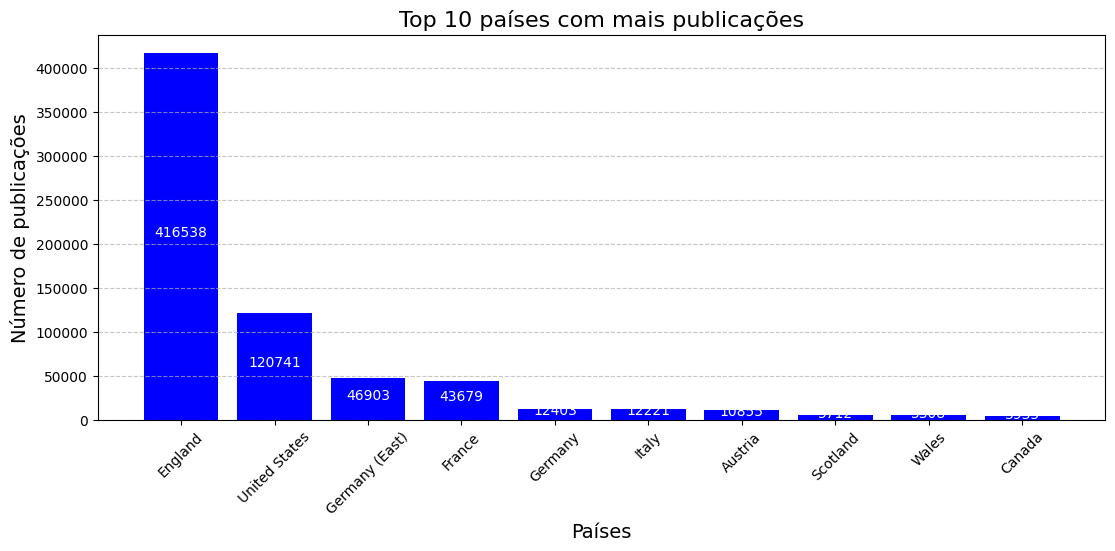

In [84]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color = 'white',fontsize=10)

plt.figure(figsize=(13,5))
plt.bar(x=top_10_paises.index, height=top_10_paises, color='blue')
plt.xlabel('Países', fontsize=14)
plt.ylabel('Número de publicações', fontsize=14)
plt.title('Top 10 países com mais publicações', fontsize=16)
addlabels(x=top_10_paises.index, y=top_10_paises)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

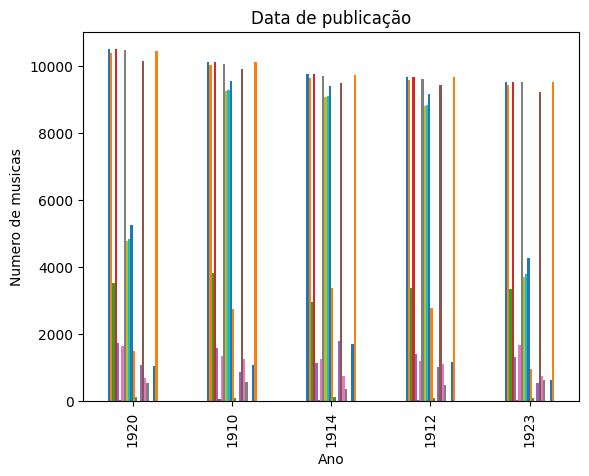

In [85]:
# separando o dataset por Data de publicação

data_publicação = musicas.groupby("Data de publicação (padronizada)").count()
top_5 = data_publicação.nlargest(5, "ID da gravação")

# Imprime os grupos resultantes

top_5.plot(kind='bar',legend=False)

# Adiciona título ao gráfico e rótulos aos eixos
plt.title("Data de publicação")
plt.xlabel("Ano")
plt.ylabel("Numero de musicas")

# Exibe o gráfico
plt.show()


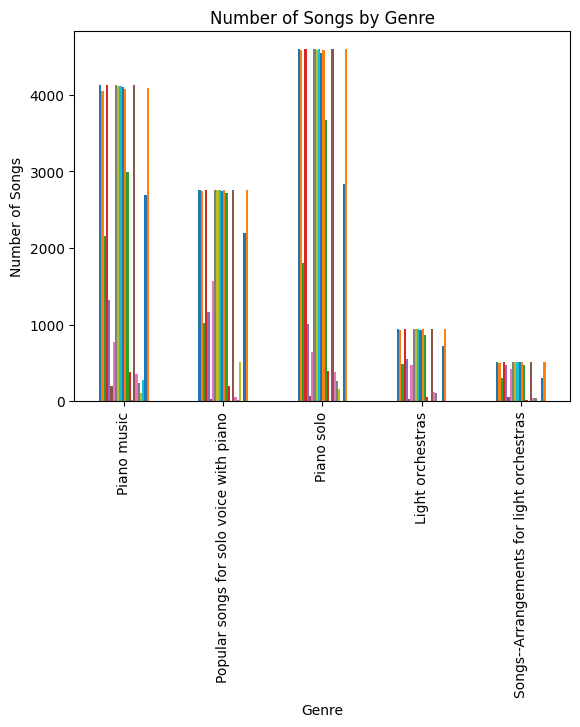

In [86]:
# Conta o número de músicas em cada gênero
count_by_genre = musicas.groupby("Genero").count()

# Seleciona a coluna de título padronizado para contar o número de músicas por gênero
count_by_genre = count_by_genre.nlargest(5, "Titulo padronizado")

# Plota o número de músicas por gênero em um gráfico de barra
count_by_genre.plot(kind='bar',legend=False)

# Adiciona título ao gráfico e rótulos aos eixos
plt.title("Number of Songs by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")

# Exibe o gráfico
plt.show()

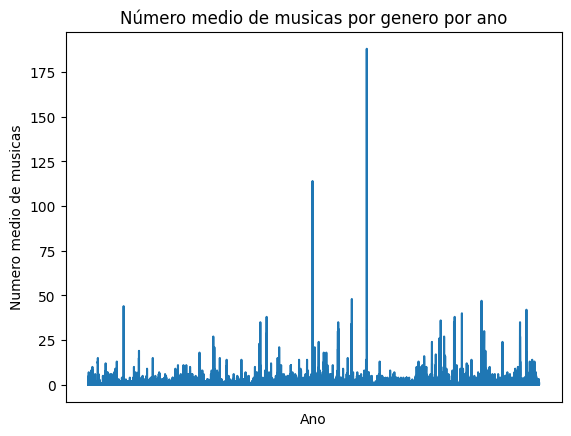

In [87]:
# Agrupe as músicas por gênero e ano de publicação
grouped = musicas.groupby(['Genero', 'Data de publicação (padronizada)'])

# Calcule a média de músicas por gênero e ano de publicação
mean_by_genre_and_year = grouped['Titulo padronizado'].count().groupby(['Genero', 'Data de publicação (padronizada)']).mean()

# Plota a média de músicas por gênero e ano de publicação em um gráfico de linha
mean_by_genre_and_year.plot(kind='line', x='Data de publicação (padronizada)', y='Titulo padronizado')

# Adiciona título ao gráfico e rótulos aos eixos
plt.title("Número medio de musicas por genero por ano")
plt.xlabel("Ano")
plt.ylabel("Numero medio de musicas")
plt.xticks([])

# Exibe o gráfico
plt.show()

In [88]:
#Usando uma operação de filtragem no dataset

Filtrado = musicas[(musicas['Genero'].notnull()) & (musicas['Data de publicação (padronizada)'] > 1980) & (musicas['Genero'].str.contains("rock"))]
Filtrado

,ID da gravação,Compositor,Datas de vida do compositor,Titulo,Titulo padronizado,Outros titulos,Outros nomes,Data de publicação (padronizada),Data de publicação (não padronizada),País de publicação,...,Conteudos extras,Referencias,Genero,Descrição física,Titulo da série,Número dentro da série,ISBN,ISMN,Número da editora,Marca de Prateleira
621942,5024732,"Dylan, Bob",1941-,The concise Bob Dylan : the music and complete...,Songs. Selections. arranged,NaN,"Evans, Peter",1997,c1997,England,...,NaN,NaN,Folk-rock music ; Popular music--Fake books,"157 pages, 25 cm",NaN,NaN,0711957800,NaN,AM937200,E.1080.a.(1.)
623660,5026558,"Anderson, Ian",1947-,The best of - Jethro Tull : [10 songs arranged...,Songs. Selections,NaN,"Evans, Peter",2000,c2000,England,...,NaN,NaN,Popular music--1961-1970 ; Popular music--1971...,"1 score (48 pages), 31 cm",NaN,NaN,0711983925,NaN,AM966350,G.1314.z.(3.)
624082,5026997,Corrs (Musical group),NaN,Play guitar with-- The Corrs : on six of their...,Songs. Selections,NaN,"Dick, Arthur",1999,c1999,England,...,"Erin Shore (Intro) -- Forgiven, not forgotten ...",NaN,Popular music--1991-2000 ; Folk-rock music,"1 score (45 pages), 31 cm + 1 sound disc (digi...",NaN,NaN,0711978654,NaN,AM960971,G.1415.ss.(3.)
624394,5027326,Corrs (Musical group),NaN,"Forgiven, not forgotten : [the album arranged ...",NaN,NaN,"Jones, Derek",1999,c1999,England,...,Contents: Erin shore (Traditional intro) -- Fo...,NaN,Folk-rock music ; Folk music--Ireland ; Violin...,"1 score (72 pages), 31 cm",NaN,NaN,0711974063,NaN,AM959123,VH05/8131 ; G.1428.vv.(1.)
624524,5027464,Corrs (Musical group),NaN,The Corrs for violin,Songs. Selections. arranged,NaN,"Crehan, Dermot",1999,c1999,England,...,NaN,NaN,"Folk-rock music ; Violin music, Arranged","31 pages, 31 cm",NaN,NaN,0711978719,NaN,AM961037,G.1428.ee.(3.)
629019,5032059,"Simon, Paul",1941-,Simon and Garfunkel hits,Songs. Selections. arranged,NaN,"Dadi, Marcel",1997,1997,France,...,Contents: April come she will ̂Bookends ̂The b...,NaN,Folk-rock music ; Guitar music (Folk-rock),"1 score (80 pages), 31 cm",NaN,NaN,NaN,NaN,EMF 100639,G.1428.bb.(5.)
631806,5034913,"Saliers, Emily",1963-,Selections from Indigo Girls : 1200 curfews,Songs. Selections,NaN,"Ray, Amy ; Whitehill, David ; Anderson, Fred ;...",1998,1998,United States,...,Closer to fine -- Galileo -- Ghost -- I don't ...,NaN,Folk-rock music ; Guitar music (Folk-rock),"1 score (126 pages), illustrations, 31 cm",Guitar recorded versions,NaN,079356638X,NaN,HL00690136,VH05/8218 ; G.1428.ff.(2.)
633851,5037086,"Haskell, Gordon",1946-,"Harry's bar : piano, vocal, guitar",NaN,NaN,"Harvey, Chris",2002,2002,England,...,Contents: How wonderful you are -- All the tim...,NaN,Popular music--2001-2010 ; Folk-rock music,"1 score (64 pages), 31 cm",NaN,NaN,1843281791,570211791,9672A,G.1431.s.(1.)
635651,5038934,Corrs (Musical group),NaN,The best so far,Songs. Selections,NaN,NaN,2000,c2000,England,...,NaN,NaN,Folk-rock music,"1 score (80 pages), 31 cm",NaN,NaN,0711987564,NaN,AM969463,G.1431.p.(2.)
843541,5247697,"Gold, Ken",NaN,Who's gonna rock you,Who's gonna rock you. arranged,NaN,"Ocean, Billy ; Nolans",1982,"1982, c1980",England,...,NaN,NaN,Disco rock songs for solo voice with piano,"1 score (4 pages), 31 cm",NaN,NaN,NaN,NaN,NaN,G.296.s.(8.)


In [89]:
fim_pandas_musica = time.time()

---
### Trabalhando com o Dataset maior usando SPARK
---

In [90]:
inicio_spark_musica = time.time()

In [91]:
## iniciando o spark

spark = SparkSession.builder.appName("Musicas Data").getOrCreate()

In [92]:
#lendo o arquivo .csv

musicas_spark = spark.read.csv("2detailedrecords.csv", header=True, inferSchema=True)

musicas_spark.show(5)

+------------+--------------------+-------------------+--------------------+------------------+--------------------+--------------------+-------------------------------+-----------------------------------+----------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+--------------------+------------+--------------------+----------+----+----------------+--------------------+
|BL record ID|            Composer|Composer life dates|               Title|Standardised title|        Other titles|         Other names|Publication date (standardised)|Publication date (not standardised)|Country of publication|Place of publication|           Publisher|               Notes|            Contents|  Referenced in| Subject/genre terms|Physical description|Series title|Number within series|      ISBN|ISMN|Publisher number|        BL shelfmark|
+------------+--------------------+-------------------+--------------------+------

In [93]:
#verificando o tamanho do dataset

print((musicas_spark.count(),len(musicas_spark.columns)))

(1045508, 23)


In [94]:
## Alterando os nomes das colunas

colunas = {'BL record ID':'ID da gravação', 'Composer':'Compositor', 'Composer life dates':'Datas de vida do compositor', 'Title':'Titulo',
            'Standardised title':'Titulo padronizado', 'Other titles':'Outros titulos','Other names':'Outros nomes',
            'Publication date (standardised)':'Data de publicação (padronizada)', 'Publication date (not standardised)':'Data de publicação (não padronizada)',
             'Country of publication':'País de publicação', 'Place of publication':'Local de publicação', 'Publisher':'Editora','Notes':'Notas',
             'Contents':'Conteudos extras','Referenced in':'Referencias' ,'Subject/genre terms':'Genero','Physical description':'Descrição física',
             'Series title':'Titulo da série','Number within series':'Número dentro da série',
             'Publisher number':'Número da editora','BL shelfmark':'Marca de Prateleira'
            }

for coluna_antiga, coluna_nova in colunas.items():
    musicas_spark = musicas_spark.withColumnRenamed(coluna_antiga, coluna_nova)

In [95]:
# Verificando os valores ausentes
from pyspark.sql import functions as f

frequencia = musicas_spark.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in musicas_spark.columns])
percentual_na = musicas_spark.select([(f.count(f.when(f.isnull(c), 1))/musicas_spark.count() *100).alias(c) for c in musicas_spark.columns])
percentual_na = percentual_na.select([f.round(c,2).alias(c) for c in percentual_na.columns])
valores_ausentes = frequencia.unionAll(percentual_na)
valores_ausentes.toPandas().transpose().rename(columns={0:'Frequência', 1:'% de NAs'})

,Frequência,% de NAs
ID da gravação,0.0,0.00
Compositor,42059.0,4.02
Datas de vida do compositor,583223.0,55.78
Titulo,22.0,0.00
Titulo padronizado,807218.0,77.21
Outros titulos,1033224.0,98.83
Outros nomes,794108.0,75.95
Data de publicação (padronizada),21494.0,2.06
Data de publicação (não padronizada),15216.0,1.46
País de publicação,334205.0,31.97


In [96]:
# verificando os tipos de dados do df
musicas_spark.printSchema()

root
 |-- ID da gravação: integer (nullable = true)
 |-- Compositor: string (nullable = true)
 |-- Datas de vida do compositor: string (nullable = true)
 |-- Titulo: string (nullable = true)
 |-- Titulo padronizado: string (nullable = true)
 |-- Outros titulos: string (nullable = true)
 |-- Outros nomes: string (nullable = true)
 |-- Data de publicação (padronizada): integer (nullable = true)
 |-- Data de publicação (não padronizada): string (nullable = true)
 |-- País de publicação: string (nullable = true)
 |-- Local de publicação: string (nullable = true)
 |-- Editora: string (nullable = true)
 |-- Notas: string (nullable = true)
 |-- Conteudos extras: string (nullable = true)
 |-- Referencias: string (nullable = true)
 |-- Genero: string (nullable = true)
 |-- Descrição física: string (nullable = true)
 |-- Titulo da série: string (nullable = true)
 |-- Número dentro da série: string (nullable = true)
 |-- ISBN: string (nullable = true)
 |-- ISMN: string (nullable = true)
 |-- Núme

In [97]:
# Otimizando o tamanho da variável ano_lancamento

from pyspark.sql.types import IntegerType, StringType

musicas_spark = musicas_spark.withColumn('ID da gravação', musicas_spark['ID da gravação'].cast(IntegerType()))
musicas_spark = musicas_spark.withColumn('Data de publicação (padronizada)', musicas_spark['Data de publicação (padronizada)'].cast(IntegerType()))


In [98]:
musicas_spark.printSchema()

root
 |-- ID da gravação: integer (nullable = true)
 |-- Compositor: string (nullable = true)
 |-- Datas de vida do compositor: string (nullable = true)
 |-- Titulo: string (nullable = true)
 |-- Titulo padronizado: string (nullable = true)
 |-- Outros titulos: string (nullable = true)
 |-- Outros nomes: string (nullable = true)
 |-- Data de publicação (padronizada): integer (nullable = true)
 |-- Data de publicação (não padronizada): string (nullable = true)
 |-- País de publicação: string (nullable = true)
 |-- Local de publicação: string (nullable = true)
 |-- Editora: string (nullable = true)
 |-- Notas: string (nullable = true)
 |-- Conteudos extras: string (nullable = true)
 |-- Referencias: string (nullable = true)
 |-- Genero: string (nullable = true)
 |-- Descrição física: string (nullable = true)
 |-- Titulo da série: string (nullable = true)
 |-- Número dentro da série: string (nullable = true)
 |-- ISBN: string (nullable = true)
 |-- ISMN: string (nullable = true)
 |-- Núme

In [99]:
# Agrupando os valores por país de publicação

pais_publicacao = musicas_spark.groupBy('País de publicação').agg(f.count("*").alias("total")).sort(f.desc('total')) 
pais_publicacao.show(3)

+------------------+------+
|País de publicação| total|
+------------------+------+
|           England|416538|
|              null|334205|
|     United States|120741|
+------------------+------+
only showing top 3 rows



In [100]:
# Top 10 paises com mais publicações

top_10_paises = pais_publicacao.limit(10)
top_10_paises = top_10_paises.toPandas()
top_10_paises

,País de publicação,total
0,England,416538
1,None,334205
2,United States,120741
3,Germany (East),46903
4,France,43679
5,Germany,12403
6,Italy,12221
7,Austria,10855
8,Scotland,5712
9,Wales,5308


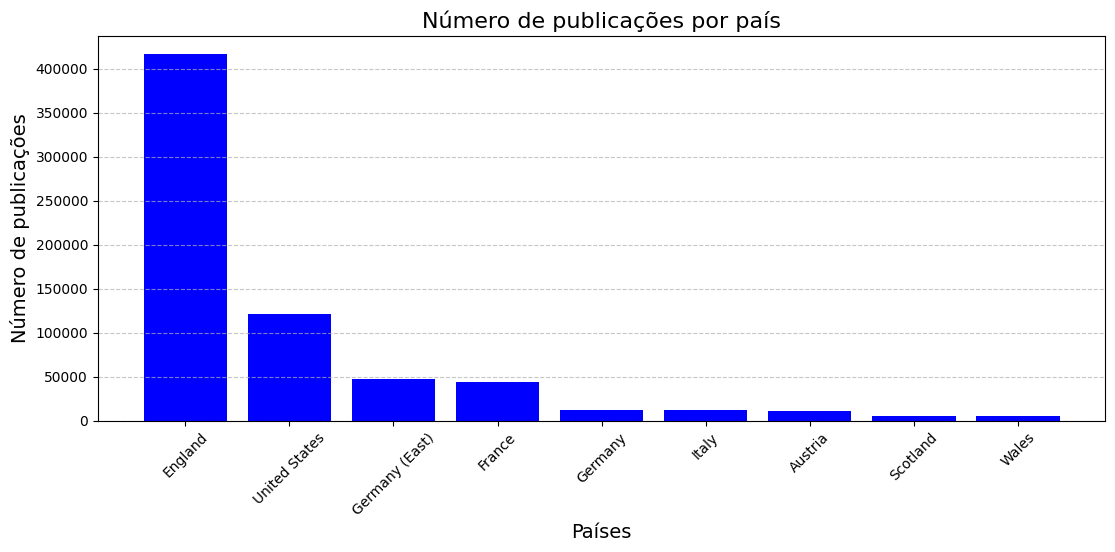

In [101]:
top_10_paises = top_10_paises.dropna().reset_index(drop=True)
plt.figure(figsize=(13,5))
plt.bar(x=top_10_paises['País de publicação'], height=top_10_paises['total'], color='blue')
plt.xlabel('Países', fontsize=14)
plt.ylabel('Número de publicações', fontsize=14)
plt.title('Número de publicações por país', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


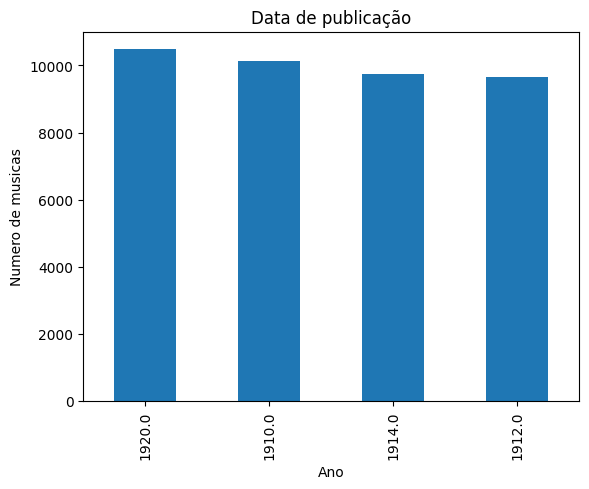

In [102]:
from pyspark.sql.functions import count

# separando o dataset por Data de publicação
data_publicação = musicas_spark.groupBy("Data de publicação (padronizada)").agg(count("*").alias("count"))
top_5 = data_publicação.sort(data_publicação["count"].desc()).limit(5)

# Convertendo o DataFrame Spark em um DataFrame Pandas
pdf = top_5.toPandas().dropna()

# Imprime os grupos resultantes
pdf.plot(kind='bar', x='Data de publicação (padronizada)', y='count', legend=False)

# Adiciona título ao gráfico e rótulos aos eixos
plt.title("Data de publicação")
plt.xlabel("Ano")
plt.ylabel("Numero de musicas")

# Exibe o gráfico
plt.show()

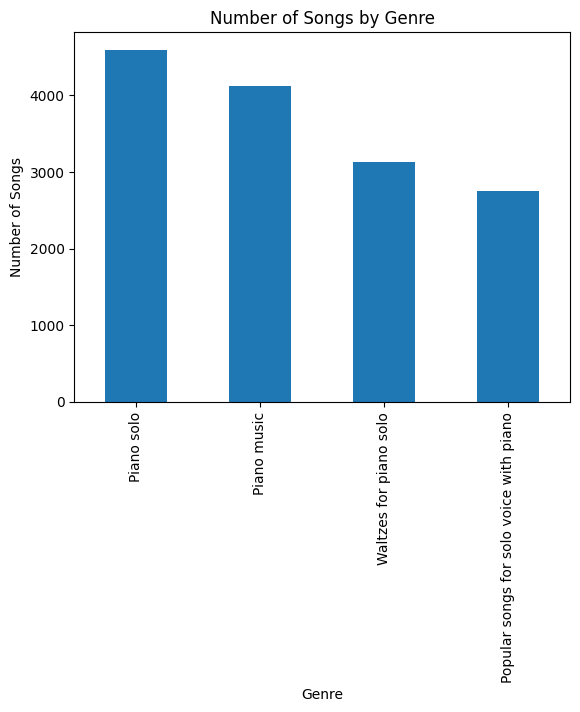

In [103]:

# Conta o número de músicas em cada gênero
count_by_genre = musicas_spark.groupBy("Genero").agg(count("*").alias("count"))

# Seleciona a coluna de título padronizado para contar o número de músicas por gênero
top_5 = count_by_genre.sort(count_by_genre["count"].desc()).limit(5)

# Convertendo o DataFrame Spark em um DataFrame Pandas
pdf = top_5.toPandas().dropna()

# Plota o número de músicas por gênero em um gráfico de barra
pdf.plot(kind='bar', x='Genero', y='count', legend=False)

# Adiciona título ao gráfico e rótulos aos eixos
plt.title("Number of Songs by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")

# Exibe o gráfico
plt.show()

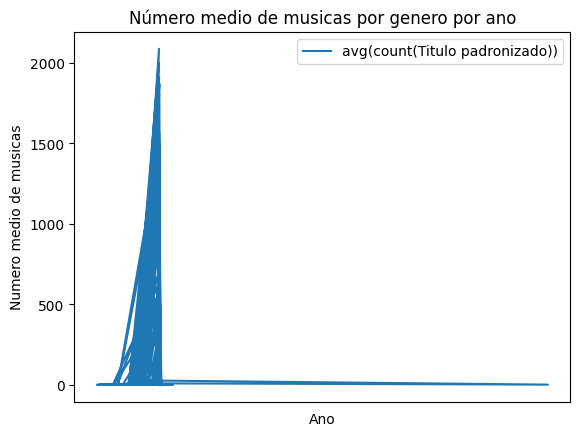

In [104]:
from pyspark.sql import functions as F

# Agrupe as músicas por gênero e ano de publicação
grouped = musicas_spark.groupBy(['Genero', 'Data de publicação (padronizada)'])


# Calcule a média de músicas por gênero e ano de publicação
mean_by_genre_and_year = grouped.agg({"Titulo padronizado": "count"}).groupBy(['Genero', 'Data de publicação (padronizada)']).mean()

mean_by_genre_and_year_pandas = mean_by_genre_and_year.toPandas()

# Plot the mean number of songs by genre and year
mean_by_genre_and_year_pandas.plot(kind='line',x='avg(Data de publicação (padronizada))', y='avg(count(Titulo padronizado))')

# Add title and axis labels to the chart
plt.title("Número medio de musicas por genero por ano")
plt.xlabel("Ano")
plt.ylabel("Numero medio de musicas")
plt.xticks([])

# Display the chart
plt.show()

In [105]:
from pyspark.sql.functions import col, expr

filtrado = musicas_spark.filter((col("Genero").isNotNull()) & (expr("`Data de publicação (padronizada)` > 1980")) & (col("Genero").rlike("rock")))
filtrado = filtrado.toPandas()
filtrado

,ID da gravação,Compositor,Datas de vida do compositor,Titulo,Titulo padronizado,Outros titulos,Outros nomes,Data de publicação (padronizada),Data de publicação (não padronizada),País de publicação,...,Conteudos extras,Referencias,Genero,Descrição física,Titulo da série,Número dentro da série,ISBN,ISMN,Número da editora,Marca de Prateleira
0,5024732,"Dylan, Bob",1941-,The concise Bob Dylan : the music and complete...,Songs. Selections. arranged,None,"Evans, Peter",1997,c1997,England,...,None,None,Folk-rock music ; Popular music--Fake books,"157 pages, 25 cm",None,None,0711957800,None,AM937200,E.1080.a.(1.)
1,5026558,"Anderson, Ian",1947-,The best of - Jethro Tull : [10 songs arranged...,Songs. Selections,None,"Evans, Peter",2000,c2000,England,...,None,None,Popular music--1961-1970 ; Popular music--1971...,"1 score (48 pages), 31 cm",None,None,0711983925,None,AM966350,G.1314.z.(3.)
2,5026997,Corrs (Musical group),None,Play guitar with-- The Corrs : on six of their...,Songs. Selections,None,"Dick, Arthur",1999,c1999,England,...,"Erin Shore (Intro) -- Forgiven, not forgotten ...",None,Popular music--1991-2000 ; Folk-rock music,"1 score (45 pages), 31 cm + 1 sound disc (digi...",None,None,0711978654,None,AM960971,G.1415.ss.(3.)
3,5027326,Corrs (Musical group),None,"Forgiven, not forgotten : [the album arranged ...",None,None,"Jones, Derek",1999,c1999,England,...,Contents: Erin shore (Traditional intro) -- Fo...,None,Folk-rock music ; Folk music--Ireland ; Violin...,"1 score (72 pages), 31 cm",None,None,0711974063,None,AM959123,VH05/8131 ; G.1428.vv.(1.)
4,5027464,Corrs (Musical group),None,The Corrs for violin,Songs. Selections. arranged,None,"Crehan, Dermot",1999,c1999,England,...,None,None,"Folk-rock music ; Violin music, Arranged","31 pages, 31 cm",None,None,0711978719,None,AM961037,G.1428.ee.(3.)
5,5032059,"Simon, Paul",1941-,Simon and Garfunkel hits,Songs. Selections. arranged,None,"Dadi, Marcel",1997,1997,France,...,Contents: April come she will ̂Bookends ̂The b...,None,Folk-rock music ; Guitar music (Folk-rock),"1 score (80 pages), 31 cm",None,None,None,None,EMF 100639,G.1428.bb.(5.)
6,5034913,"Saliers, Emily",1963-,Selections from Indigo Girls : 1200 curfews,Songs. Selections,None,"Ray, Amy ; Whitehill, David ; Anderson, Fred ;...",1998,1998,United States,...,Closer to fine -- Galileo -- Ghost -- I don't ...,None,Folk-rock music ; Guitar music (Folk-rock),"1 score (126 pages), illustrations, 31 cm",Guitar recorded versions,None,079356638X,None,HL00690136,VH05/8218 ; G.1428.ff.(2.)
7,5037086,"Haskell, Gordon",1946-,"Harry's bar : piano, vocal, guitar",None,None,"Harvey, Chris",2002,2002,England,...,Contents: How wonderful you are -- All the tim...,None,Popular music--2001-2010 ; Folk-rock music,"1 score (64 pages), 31 cm",None,None,1843281791,570211791,9672A,G.1431.s.(1.)
8,5038934,Corrs (Musical group),None,The best so far,Songs. Selections,None,None,2000,c2000,England,...,None,None,Folk-rock music,"1 score (80 pages), 31 cm",None,None,0711987564,None,AM969463,G.1431.p.(2.)
9,5247697,"Gold, Ken",None,Who's gonna rock you,Who's gonna rock you. arranged,None,"Ocean, Billy ; Nolans",1982,"1982, c1980",England,...,None,None,Disco rock songs for solo voice with piano,"1 score (4 pages), 31 cm",None,None,None,None,None,G.296.s.(8.)


In [106]:
fim_spark_musica = time.time()

---
### Comparando os resultados
---

In [107]:

# Tempo de execução para o dataframe menor usando:
print('Tempo de execução para o dataframe menor usando:')

#Pandas
t1 = fim_pandas_netflix - inicio_pandas_netflix
print(f'Usando Pandas: {t1}')

#Spark
t2 = fim_spark_netflix - inicio_pandas_netflix
print(f'Usando Spark: {t2}')

# Tempo de execução para o dataframe menor usando:
print('Tempo de execução para o dataframe maior usando:')

#Pandas
t3 = fim_pandas_musica - inicio_pandas_netflix
print(f'Usando Pandas: {t3}')

#Spark
t4 = fim_spark_musica - inicio_spark_musica
print(f'Usando Spark: {t4}')



Tempo de execução para o dataframe menor usando:
Usando Pandas: 3.970876693725586
Usando Spark: 25.69958257675171
Tempo de execução para o dataframe maior usando:
Usando Pandas: 60.693573236465454
Usando Spark: 47.30321025848389
